# ADS 509 Sentiment Assignment - Sarah Alqaysi

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import warnings

# Suppress warning messages
warnings.filterwarnings('ignore')

import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [244]:
# Add any additional import statements you need here

import nltk
import os
import re
import emoji
import pandas as pd

from nltk.corpus import stopwords
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from sklearn.decomposition import TruncatedSVD


In [3]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

data_location = "/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week two/M1 Assignment Data/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




### Cher lyrics

In [52]:
# Read in the lyrics data

with open("C:/Users/z003cu8m/Desktop/cher_behindthedoor.txt") as f:
    cher_door = f.read()
    #print(cher_door)
    
text_door = '''
Behind the door of every house,
In every street, in every town
A story is unfolding
A story is unfolding of love and hate
The most of us wait of hopes and fears
Of smiles and tears of dreams
That lies a moldering

Behind the door of every house,
In every street, in every town
The stage is set for playing
The stage is set for playing
And I call crime and punch your mime
Sweet romance, a rich will dance
Characters are playing

Behind the door of every house,
In every street, in every town
The people are a waiting
The people are a waiting
To bare and die, the years go by
The wedding spree the cruelty
And still they go on mating

And to the one the only one
Remember when the need of man
Is greater again
The prayers take off ascending
All filled of love to the one above
Asking for asking for asking for asking for
A happy ending a happy ending a happy ending'''

In [54]:
with open("C:/Users/z003cu8m/Desktop/cher_alfie.txt") as f:
    cher_alife = f.read()
    #print(cher_alife)

text_alife = '''What's it all about, Alfie?

Is it just for the moment we live?
What's it all about when you sort it out, Alfie?
Are we meant to take more than we give,
Or are we meant to be kind?
And if only fools are kind, Alfie
Then I guess it is wise to be cruel.
And if life belongs only to the strong, Alfie, 
Will you lend on an old golden rule?
As sure as I believe, there's a heaven above, Alfie,
I know there's something much more,
Something even non-believers can believe in.
I believe in love, Alfie.
Without true love we just exist, Alfie.
Until you've found the love you've missed
You're nothing, Alfie.
When you walk, let your heart lead the way.
And you'll find love any day, Alfie.
Alfie.'''

In [56]:
with open("C:/Users/z003cu8m/Desktop/cher_afterall.txt") as f:
    cher_afterall = f.read()
    #print(cher_afterall)
    
text_afterall = '''Well, here we are again
I guess it must be fate
We've tried it on our own
But deep inside we've known
We'd be back to set things straight
I still remember when
Your kiss was so brand new
Every memory repeats
Every step I take retreats
Every journey always brings me back to you

After all the stops and starts
We keep coming back to these two hearts
Two angels who've been rescued from the fall
After all that we've been through
It all comes down to me and you
I guess it's meant to be forever you and me
After all

When love is truly right, it lives from year to year
It changes as it goes and on the way it grows
But it never disappears

After all the stops and starts
We keep coming back to these two hearts
Two angels who've been rescued from the fall
After all that we've been through
It all comes down to me and you
I guess it's meant to be forever you and me
After all

Always just beyond my touch
You know I needed you so much
After all, what else is living for?

After all the stops and starts
We keep coming back to these two hearts
Two angels who've been rescued from the fall
After all that we've been through
It all comes down to me and you
I guess it's meant to be forever you and me

After all the stops and starts
We keep coming back to these two hearts
Two angels who've been rescued from the fall
After all that we've been through
It all comes down to me and you
I guess it's meant to be forever you and me
After all'''

In [65]:
with open("C:/Users/z003cu8m/Desktop/cher_again.txt") as f:
    cher_again = f.read()
    #print(cher_again)
    
text_again = '''Again evening finds me at your door 
Here to ask you just once more 
If we could try again 
I don't know quite what to say 
Never was too good that way 
So won't you help me again 

I don't know what made me leave 
If you just take me back you see 
How much I love you 

Again don't stand crying in the door 
If you believe your eyes once more 
You see I'll never lie again'''

In [60]:
with open("C:/Users/z003cu8m/Desktop/cher_angelsrunning.txt") as f:
    cher_lyrics = f.read()
    #print(cher_lyrics)
    
cher_text = """Angels Running"

Well I heard enough 
And I've seen enough
And I know anough to know 
I know a good thing when I see it
And it's a bad thing to let go

Weel I've been around 
I've been up and down 
Until I bailed out of control 
With your world all in motion
Gonna put a ball
And chain on your soul 

All those angels running 
Picking up the pieces 
Putting hearts togheter 
Broke long ago 
I know a good thing when I see it 
And it's a bad thing to let go 

We'll always be lovers 
With borders of there own 
And you may charge across 
In a golden chariot 
But you will never be at home 

'Cause I had dreams 
Like distant thunder
I had hope like a prayer unheard 
This nothing less than perfect
In a less than perfect world 

All those angles running 
Picking up the pieces 
Putting back togheter 
Hearts broke long ago 
I know a good thing when I see it 
And it's a bad thing to let go 
It's a bad thing to let go 
It's a bad thing."""

In [205]:
# create your clean lyrics data here

import regex as re

from nltk.corpus import stopwords

def tokenize(cher_text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_cher_lyrics)

stopwords = stopwords.words('english')

tokens = cher_text.split()
clean_tokens = [t for t in tokens if not t in stopwords]
clean_cher_stopwords = " ".join(clean_tokens)

clean_cher_text = str.lower(clean_cher_stopwords)
clean_cher_text = clean_cher_text.split()

df_cher = pd.DataFrame(clean_cher_text)
df_cher.columns =['lyrics_words']
#df_cher.head(10)


def tokenize(text_door):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_door_lyrics)

tokens_door = text_door.split()
clean_tokens_door = [t for t in tokens_door if not t in stopwords]
clean_door_stopwords = " ".join(clean_tokens_door)

clean_door_text = str.lower(clean_door_stopwords)
clean_door_text = clean_door_text.split()

df_door = pd.DataFrame(clean_door_text)
df_door.columns =['lyrics_door']
#df_door.head(10)


def tokenize(text_alife):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_alife_lyrics)

tokens_alife = text_alife.split()
clean_tokens_alife = [t for t in tokens_alife if not t in stopwords]
clean_alife_stopwords = " ".join(clean_tokens_alife)

clean_alife_text = str.lower(clean_alife_stopwords)
clean_alife_text = clean_alife_text.split()

df_alife = pd.DataFrame(clean_alife_text)
df_alife.columns =['lyrics_alife']
#df_alife.head(10)


def tokenize(text_afterall):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_afterall_lyrics)

tokens_afterall = text_afterall.split()
clean_tokens_afterall = [t for t in tokens_afterall if not t in stopwords]
clean_afterall_stopwords = " ".join(clean_tokens_afterall)

clean_afterall_text = str.lower(clean_afterall_stopwords)
clean_afterall_text = clean_afterall_text.split()

df_afterall = pd.DataFrame(clean_afterall_text)
df_afterall.columns =['lyrics_afterall']
#df_afterall.head(10)


def tokenize(text_again):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_again_lyrics)

tokens_again = text_again.split()
clean_tokens_again = [t for t in tokens_again if not t in stopwords]
clean_again_stopwords = " ".join(clean_tokens_again)

clean_again_text = str.lower(clean_again_stopwords)
clean_again_text = clean_again_text.split()

df_again = pd.DataFrame(clean_again_text)
df_again.columns =['lyrics_again']
#df_again.head(10)

### Robyn lyrics

In [189]:
with open("C:/Users/z003cu8m/Desktop/robyn_anytimeyoulike.txt") as f:
    robyn_anytime = f.read()
    #print(robyn_lyrics)
    
text_anytime = '''It's like you're waiting for me to start
There's no right moment to break my heart
Boy you can tell me any time you like

We could talk any day of the week
I cry myself to sleep in my pink silk sheets
Boy you can tell me any time you like
Boy you can tell me any time you like

Under pressure, alright
Under pressure, you and I
Under pressure, love is uptight
Under pressure, yeah

I keep quiet and hope you forget
You know that kitchen table, let's buy it
Boy you can tell me anytime you like, anytime

If I was brave I wouldn't keep my mouth shut
But I'm selfish, I don't wanna give you up
Boy you can tell me anytime you like
Boy you can tell me anytime you like

Under pressure, alright
Under pressure, you and I
Under pressure, love is uptight
Under pressure, yeah
Under pressure, yeah
Under pressure, alright
Under pressure, you and I
Under pressure, this love is uptight
Under pressure, yeah

Hey baby
(How ya doin'?)
How was your day?
What ya doin'?
(I said I love you)
What ya thinkin' about?
(What ya thinkin' about?)
Tell me what's on your mind
Won't you tell me what's on your mind
I love you so much, mhmm

Boy you can tell me...
Boy you can tell me any time you like
'''

In [192]:
with open("C:/Users/z003cu8m/Desktop/robyn_blowmymind.txt") as f:
    robyn_mind = f.read()
    #print(robyn_mind)
    
text_mind = '''Straight up from my heart you're my number one
And hey here's the part I'm still having fun
It's like you're the cloud underneath my feat
And you're the reason that breathe

Because you blow my mind
Because you blow my mind
And the way you're talking baby you're so cool
I'll do anything for you...

Hey baby ravish me, love me till it hurts
Don't you dare to leave , button down my skirt
Kiss me quick I'm about to burst , patience ain't my thing
And you're the reason that I sing

Because you blow my mind
Because you blow my mind
And the way you're talking baby you're so cool
I'll do anything for you...

Unbelievable, ooo it's such a rush
So incredible, boy you make me blush
Just keep doing it , throw me into space 
And I'll be floating there for days

Because you blow my mind
Because you blow my mind
And the way you're talking baby you're so cool
I'll do anything for you...'''

In [194]:
with open("C:/Users/z003cu8m/Desktop/robyn_obaby.txt") as f:
    robyn_baby = f.read()
    #print(robyn_baby)
    
text_baby = '''[Chorus:]
O baby you're making that mistake again oh why
O don't you understand, everytime you do you make me cry

I see those tears and it hurts so much each time you say you're sorry
cause no more words or regretful touch could change the way I'm feeling
You're doing me wrong again and again you say that you will but you won't

[Chorus]

I stayed up late every lonely night waiting for you to call me
I used to think if I gave you time ooo baby you'd find a way to make it right
You're doing me wrong again and again you say that you will but you won't 

[Chorus]

Don't explain and don't ask me why oh baby please stop crying
We've been through this one too many times so baby don't you put me there again
Cause no matter how hard I try to believe this tiem I know that I won't 

[Chorus]

Don't wonder why, baby don't cry, let's say goodbye'''

In [197]:
with open("C:/Users/z003cu8m/Desktop/robyn_play.txt") as f:
    robyn_play = f.read()
    #print(robyn_play)
    
text_play = '''Um Um
Some people live their lives by the book,
Some people are too scared to even look,
Some people don't even really care,
Nooo,
I'm not a woman yet still not a child,
So what am I suppose to do with my life,
It doesn't fit me anymore,
Not yet,
Right now, 

[Chorus]
When too many of us has forgot, 
What our lives is all about, 
Care too much about what other people say,
Ah yeah, 
But your heart will never grow old,
And your mind will never ever get bigger if you remember how to play,

Some people seek other's extreme too scared of their own inner hive,
Some people never asked themselves why,
No, No,
I will never try to hide behind myself,
I will never try to be somebody else,
It wouldn't do me any good,
Not yet,
Right now,

[Chorus]

Yeah'
Say yeah, 
Say yeah, 
Say yeah, 
Say yeah' yeah' yeah' yeah' yeah'

[Chorus]

Say, 
If you remember how to play,
Say yeah, yeah, yeah, yeah
Yeah'yeah'yeah'yeah'''

In [199]:
with open("C:/Users/z003cu8m/Desktop/robyn_tellyoutoday.txt") as f:
    robyn_tell = f.read()
    #print(robyn_tell)
    
text_tell = '''Tell you
Tell you Tell you Tell you Tell you Tell you Tell you Tell you Tell you Tell you Tell you Tell you

Walking down the street
I knew it was my chance
Chance today
New shoes on my feet
I thought that they could dance
Dance away

Makes me come alive, I remember
A look of sadness on your face
That was before
I want to tell you today
I want to tell you today
I want to tell you today
I want to tell you today

On my way to work
I said your name again
Again today

There was just a word
I only feel it when
When I say

Makes me come alive, I remember
A look of sadness on your face
That was before
I want to tell you today
I want to tell you today
I want to tell you today
I want to tell you today
'''

In [219]:
# create your clean lyrics data here

import regex as re

from nltk.corpus import stopwords


def tokenize(text_anytime):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_anytime_lyrics)

stopwords = stopwords.words('english')

tokens_anytime = text_anytime.split()
clean_tokens_anytime = [t for t in tokens_anytime if not t in stopwords]
clean_anytime_stopwords = " ".join(clean_tokens_anytime)

clean_text_anytime = str.lower(clean_anytime_stopwords)
clean_text_anytime = clean_text_anytime.split()

df_anytime = pd.DataFrame(clean_text_anytime)
df_anytime.columns =['lyrics_anytime']
#df_anytime.head(10)



def tokenize(text_mind):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_mind_lyrics)

#stopwords = stopwords.words('english')

tokens_mind = text_mind.split()
clean_tokens_mind = [t for t in tokens_mind if not t in stopwords]
clean_mind_stopwords = " ".join(clean_tokens_mind)

clean_text_mind = str.lower(clean_mind_stopwords)
clean_text_mind = clean_text_mind.split()

df_mind = pd.DataFrame(clean_text_mind)
df_mind.columns =['lyrics_mind']
#df_mind.head(10)


def tokenize(text_baby):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_baby_lyrics)

#stopwords = stopwords.words('english')

tokens_baby = text_baby.split()
clean_tokens_baby = [t for t in tokens_baby if not t in stopwords]
clean_baby_stopwords = " ".join(clean_tokens_baby)

clean_text_baby = str.lower(clean_baby_stopwords)
clean_text_baby = clean_text_baby.split()

df_baby = pd.DataFrame(clean_text_baby)
df_baby.columns =['lyrics_baby']
#df_baby.head(10)



def tokenize(text_play):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_play_lyrics)

#stopwords = stopwords.words('english')

tokens_play = text_play.split()
clean_tokens_play = [t for t in tokens_play if not t in stopwords]
clean_play_stopwords = " ".join(clean_tokens_play)

clean_text_play = str.lower(clean_play_stopwords)
clean_text_play = clean_text_play.split()

df_play = pd.DataFrame(clean_text_play)
df_play.columns =['lyrics_play']
#df_play.head(10)


def tokenize(text_tell):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_tell_lyrics)

#stopwords = stopwords.words('english')

tokens_tell = text_tell.split()
clean_tokens_tell = [t for t in tokens_tell if not t in stopwords]
clean_tell_stopwords = " ".join(clean_tokens_tell)

clean_text_tell = str.lower(clean_tell_stopwords)
clean_text_tell = clean_text_tell.split()

df_tell = pd.DataFrame(clean_text_tell)
df_tell.columns =['lyrics_tell']
#df_tell.head(10)

# Read in the twitter data

In [239]:
# Feel free to use the below cells as an example or read in the data in a way you prefer

data_location = "/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week three/M1 Assignment Data/M1 Results/" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [240]:
twitter_cher = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_cher['artist'] = "cher"

In [241]:
twitter_robyn = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_robyn['artist'] = "robyn"

In [245]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords

from nltk.corpus import stopwords

sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    
    return(0)


    
def is_emoji(s):
    return(s in all_language_emojis)

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


In [246]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

twitter_cher["tokens"] = twitter_cher["description"].apply(prepare,pipeline=my_pipeline)
twitter_cher["num_tokens"] = twitter_cher["tokens"].map(len) 

twitter_robyn["tokens"] = twitter_robyn["description"].apply(prepare,pipeline=my_pipeline)
twitter_robyn["num_tokens"] = twitter_robyn["tokens"].map(len) 

In [247]:
# cher
twitter_cher['has_emoji'] = twitter_cher["description"].apply(contains_emoji)

# robyn
twitter_robyn['has_emoji'] = twitter_robyn["description"].apply(contains_emoji)

In [259]:
# cher
df_twitter_cher = twitter_cher[twitter_cher.has_emoji].sample(20)[["artist","description","tokens"]]
df_twitter_cher.head()

,artist,description,tokens
470661,cher,"20😱,she/her, shy, pan🏳️‍🌈. ❤️’s music, kpop, M...",20😱sheher shy pan🏳️‍🌈 ❤️’s music kpop multista...
608685,cher,"Eternal love, the stars above, all there is an...",eternal love the stars above all there is and ...
2586128,cher,Peter Andre follows :). Matt Goss follows :) C...,peter andre follows matt goss follows chesne...
1437593,cher,We are just two friends trying to navigate thi...,we are just two friends trying to navigate thi...
313010,cher,Looking for #GoodTrouble. DJT and the GOP are ...,looking for #goodtrouble djt and the gop are s...


In [332]:
# robyn
df_twitter_robyn = twitter_robyn[twitter_robyn.has_emoji].sample(20)[["artist","description","tokens"]]
df_twitter_robyn.head()

,artist,description,tokens
155956,robyn,♬ •♩ ·.·´¯`·.·♭•♪ ίλɱ λħɱεɖ κλßιλɴ ʃરΘɱ ιίßϓλ ...,♬ •♩ ··´¯··♭•♪ ίλɱ λħɱεɖ κλßιλɴ ʃરθɱ ιίßϓλ 《ßθ...
1833,robyn,"he/him, Newtown, 20, Libra 🌈",hehim newtown 20 libra 🌈
193571,robyn,Esas segundas oportunidades que se convierten ...,esas segundas oportunidades que se convierten ...
3959,robyn,♎️♍️♋️,♎️♍️♋️
86387,robyn,I like pro wrestling and Harry Styles💞,i like pro wrestling and harry styles💞


In [76]:
import nltk
#nltk.download('opinion_lexicon')

In [81]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:5])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:5])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


In [82]:
# Let's create a dictionary which we can use for scoring our review text
# Please uncomment this line the first-time you run this code to download the vocabulary from nltk ###
### nltk.download('punkt') ###

twitter_cher.rename(columns={'description': 'text'}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
        
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
        
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

In [349]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

In [66]:
df_positive = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week six/ads-tm-sentiment-main/ads-tm-sentiment-main/positive-words.txt", error_bad_lines=False)
df_positive.head(10)

df_positive.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 'text'}, inplace=True)
df_positive['Bing_Liu_Score'] = df_positive['text'].apply(bing_liu_score)
df_positive[['text','Bing_Liu_Score']].sample(10, random_state=0)

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,text,Bing_Liu_Score
1465,recommended,1.0
229,bless,1.0
1887,uncomplicated,1.0
511,ecstatically,1.0
1432,quiet,1.0
781,fortitude,1.0
1103,leverage,1.0
361,congenial,1.0
674,exquisite,1.0
536,elevate,1.0


In [40]:
df_negative = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week six/ads-tm-sentiment-main/ads-tm-sentiment-main/negative-words.txt", encoding='latin-1', error_bad_lines=False)
df_negative.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 'text'}, inplace=True)
df_negative['Bing_Liu_Score'] = df_negative['text'].apply(bing_liu_score)
df_negative[['text','Bing_Liu_Score']].sample(10, random_state=0)

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,text,Bing_Liu_Score
825,cuplrit,-1.0
1705,flake,-1.0
4132,stutter,-1.0
3537,reluctance,-1.0
3555,repression,-1.0
2060,hideously,-1.0
2592,irresolvable,-1.0
4312,toughness,-1.0
1933,grudgingly,-1.0
575,chaotic,-1.0


In [84]:
df_tidy = pd.read_csv(r"C:/Users/z003cu8m/Desktop/tidy_csv_new.csv")
df_tidy['sentiment'] = df_tidy['sentiment'].replace(['negative'], -1.0)
df_tidy['sentiment'] = df_tidy['sentiment'].replace(['positive'], 1.0)
df_tidy.head(10)

,word,sentiment,lexicon
0,abandon,-1.0,nrc
1,abandoned,-1.0,nrc
2,abandonment,-1.0,nrc
3,abba,1.0,nrc
4,abduction,-1.0,nrc
5,aberrant,-1.0,nrc
6,aberration,-1.0,nrc
7,abhor,-1.0,nrc
8,abhorrent,-1.0,nrc
9,ability,1.0,nrc


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


### Cher

In [153]:
# your code here

df_cher['Bing_Liu_Score'] = df_cher['lyrics_words'].apply(bing_liu_score)
df_cher[['lyrics_words','Bing_Liu_Score']].sample(10, random_state=0)

df_door['Bing_Liu_Score'] = df_door['lyrics_door'].apply(bing_liu_score)
df_door[['lyrics_door','Bing_Liu_Score']].sample(10, random_state=0)

df_alife['Bing_Liu_Score'] = df_alife['lyrics_alife'].apply(bing_liu_score)
df_alife[['lyrics_alife','Bing_Liu_Score']].sample(10, random_state=0)

df_afterall['Bing_Liu_Score'] = df_afterall['lyrics_afterall'].apply(bing_liu_score)
df_afterall[['lyrics_afterall','Bing_Liu_Score']].sample(10, random_state=0)

df_again['Bing_Liu_Score'] = df_again['lyrics_again'].apply(bing_liu_score)
df_again[['lyrics_again','Bing_Liu_Score']].sample(10, random_state=0)


result = pd.concat([df_cher, df_door, df_alife, df_afterall, df_again], axis=1)
result.head(10)

,lyrics_words,Bing_Liu_Score,lyrics_door,Bing_Liu_Score,lyrics_alife,Bing_Liu_Score,lyrics_afterall,Bing_Liu_Score,lyrics_again,Bing_Liu_Score
0,angels,0.0,behind,0.0,what's,0.0,"well,",0.5,again,0.0
1,"running""",0.0,the,0.0,"about,",0.0,i,0.0,evening,0.0
2,well,1.0,door,0.0,alfie?,0.0,guess,0.0,finds,0.0
3,i,0.0,behind,0.0,is,0.0,must,0.0,door,0.0
4,heard,0.0,door,0.0,moment,0.0,fate,0.0,here,0.0
5,enough,1.0,every,0.0,live?,0.0,we've,0.0,ask,0.0
6,and,0.0,"house,",0.0,what's,0.0,tried,0.0,if,0.0
7,i've,0.0,in,0.0,sort,0.0,but,0.0,could,0.0
8,seen,0.0,every,0.0,"out,",0.0,deep,0.0,try,0.0
9,enough,1.0,"street,",0.0,alfie?,0.0,inside,0.0,i,0.0


In [154]:
g_cher = df_cher.groupby('lyrics_words')['Bing_Liu_Score']
counts = g_cher.agg(
    pos_count=lambda s: s.gt(0).sum(),
    neg_count=lambda s: s.lt(0).sum(),
    net_count=lambda s: s.gt(0).sum()- s.lt(0).sum()).astype(int)


g_door = df_door.groupby('lyrics_door')['Bing_Liu_Score']
counts = g_door.agg(
    pos_count=lambda s: s.gt(0).sum(),
    neg_count=lambda s: s.lt(0).sum(),
    net_count=lambda s: s.gt(0).sum()- s.lt(0).sum()).astype(int)


g_alife = df_alife.groupby('lyrics_alife')['Bing_Liu_Score']
counts = g_alife.agg(
    pos_count=lambda s: s.gt(0).sum(),
    neg_count=lambda s: s.lt(0).sum(),
    net_count=lambda s: s.gt(0).sum()- s.lt(0).sum()).astype(int)


g_afterall = df_afterall.groupby('lyrics_afterall')['Bing_Liu_Score']
counts = g_afterall.agg(
    pos_count=lambda s: s.gt(0).sum(),
    neg_count=lambda s: s.lt(0).sum(),
    net_count=lambda s: s.gt(0).sum()- s.lt(0).sum()).astype(int)


g_again = df_again.groupby('lyrics_again')['Bing_Liu_Score']
counts = g_again.agg(
    pos_count=lambda s: s.gt(0).sum(),
    neg_count=lambda s: s.lt(0).sum(),
    net_count=lambda s: s.gt(0).sum()- s.lt(0).sum()).astype(int)


In [178]:
count_cher=(df_cher.assign(type=np.sign(df_cher['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_cher['lyrics_words'])['type']
        .value_counts()
        .reset_index(name='count'))
count_cher

count_cher['type'].value_counts()

neutral      61
pos_count     6
neg_count     2
Name: type, dtype: int64

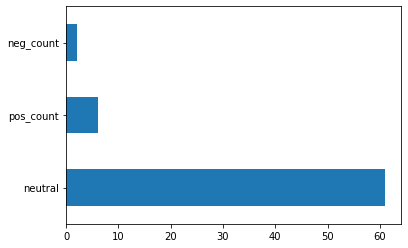

In [179]:
count_cher['type'].value_counts()[:20].plot(kind='barh')

In [180]:
count_door=(df_door.assign(type=np.sign(df_door['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_door['lyrics_door'])['type']
        .value_counts()
        .reset_index(name='count'))
count_door

count_door['type'].value_counts()

neutral      52
neg_count     7
pos_count     5
Name: type, dtype: int64

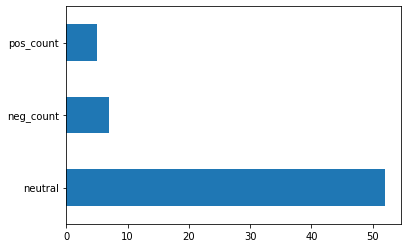

In [181]:
count_door['type'].value_counts()[:20].plot(kind='barh')

In [182]:
count_alife=(df_alife.assign(type=np.sign(df_alife['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_alife['lyrics_alife'])['type']
        .value_counts()
        .reset_index(name='count'))
count_alife

count_alife['type'].value_counts()

neutral      56
pos_count     7
neg_count     2
Name: type, dtype: int64

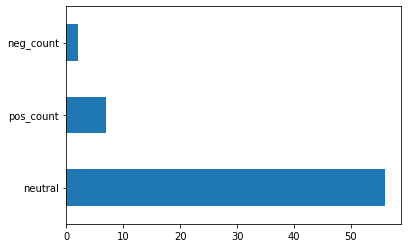

In [183]:
count_alife['type'].value_counts()[:20].plot(kind='barh')

In [184]:
count_afterall=(df_afterall.assign(type=np.sign(df_afterall['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_afterall['lyrics_afterall'])['type']
        .value_counts()
        .reset_index(name='count'))
count_afterall

count_afterall['type'].value_counts()

neutral      65
pos_count     3
neg_count     1
Name: type, dtype: int64

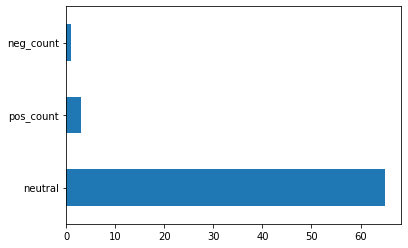

In [185]:
count_afterall['type'].value_counts()[:20].plot(kind='barh')

In [186]:
count_again=(df_again.assign(type=np.sign(df_again['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_again['lyrics_again'])['type']
        .value_counts()
        .reset_index(name='count'))
count_again

count_again['type'].value_counts()

neutral      30
pos_count     2
neg_count     1
Name: type, dtype: int64

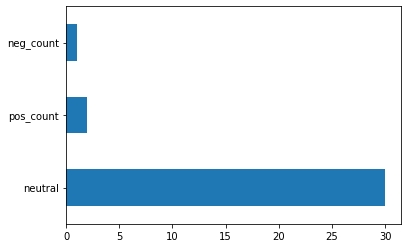

In [187]:
count_again['type'].value_counts()[:20].plot(kind='barh')

### Robyn

In [220]:
df_anytime['Bing_Liu_Score'] = df_anytime['lyrics_anytime'].apply(bing_liu_score)
df_anytime[['lyrics_anytime','Bing_Liu_Score']].sample(10, random_state=0)

df_mind['Bing_Liu_Score'] = df_mind['lyrics_mind'].apply(bing_liu_score)
df_mind[['lyrics_mind','Bing_Liu_Score']].sample(10, random_state=0)

df_baby['Bing_Liu_Score'] = df_baby['lyrics_baby'].apply(bing_liu_score)
df_baby[['lyrics_baby','Bing_Liu_Score']].sample(10, random_state=0)

df_play['Bing_Liu_Score'] = df_play['lyrics_play'].apply(bing_liu_score)
df_play[['lyrics_play','Bing_Liu_Score']].sample(10, random_state=0)

df_tell['Bing_Liu_Score'] = df_tell['lyrics_tell'].apply(bing_liu_score)
df_tell[['lyrics_tell','Bing_Liu_Score']].sample(10, random_state=0)


result_robyn = pd.concat([df_anytime, df_mind, df_baby, df_play, df_tell], axis=1)
result_robyn.head(10)

,lyrics_anytime,Bing_Liu_Score,lyrics_mind,Bing_Liu_Score,lyrics_baby,Bing_Liu_Score,lyrics_play,Bing_Liu_Score,lyrics_tell,Bing_Liu_Score
0,it's,0.0,straight,0.0,[chorus:],0.0,um,0.0,tell,0.0
1,like,1.0,heart,0.0,o,0.0,um,0.0,tell,0.0
2,waiting,0.0,number,0.0,baby,0.0,some,0.0,tell,0.0
3,start,0.0,one,0.0,making,0.0,people,0.0,tell,0.0
4,there's,0.0,and,0.0,mistake,-1.0,live,0.0,tell,0.0
5,right,1.0,hey,0.0,oh,0.0,lives,0.0,tell,0.0
6,moment,0.0,here's,0.0,o,0.0,"book,",0.0,tell,0.0
7,break,-1.0,part,0.0,"understand,",0.0,some,0.0,tell,0.0
8,heart,0.0,i'm,0.0,everytime,0.0,people,0.0,tell,0.0
9,boy,0.0,still,0.0,make,0.0,scared,-1.0,tell,0.0


In [221]:
count_anytime=(df_anytime.assign(type=np.sign(df_anytime['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_anytime['lyrics_anytime'])['type']
        .value_counts()
        .reset_index(name='count'))
count_anytime

count_anytime['type'].value_counts()

neutral      63
pos_count     6
neg_count     3
Name: type, dtype: int64

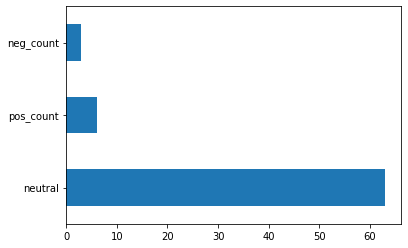

In [222]:
count_anytime['type'].value_counts()[:20].plot(kind='barh')

In [223]:
count_mind=(df_mind.assign(type=np.sign(df_mind['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_mind['lyrics_mind'])['type']
        .value_counts()
        .reset_index(name='count'))
count_mind

count_mind['type'].value_counts()

neutral      50
pos_count     7
neg_count     4
Name: type, dtype: int64

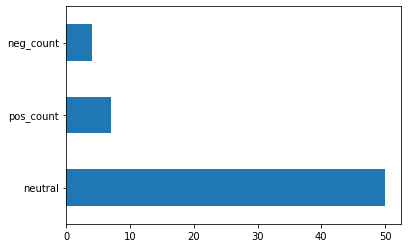

In [226]:
count_mind['type'].value_counts()[:20].plot(kind='barh')

In [224]:
count_baby=(df_baby.assign(type=np.sign(df_baby['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_baby['lyrics_baby'])['type']
        .value_counts()
        .reset_index(name='count'))
count_baby

count_baby['type'].value_counts()

neutral      54
neg_count     9
pos_count     2
Name: type, dtype: int64

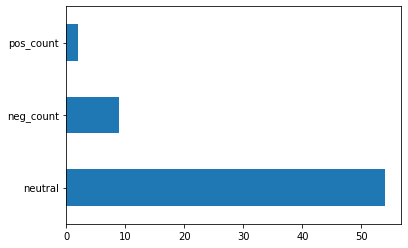

In [225]:
count_baby['type'].value_counts()[:20].plot(kind='barh')

In [228]:
count_play=(df_play.assign(type=np.sign(df_play['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_play['lyrics_play'])['type']
        .value_counts()
        .reset_index(name='count'))
count_play

count_play['type'].value_counts()

neutral      69
pos_count     2
neg_count     1
Name: type, dtype: int64

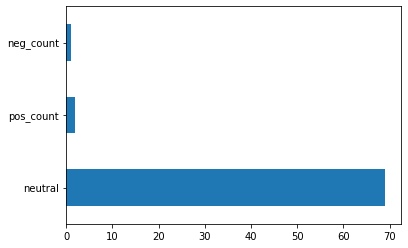

In [229]:
count_play['type'].value_counts()[:20].plot(kind='barh')

In [230]:
count_tell=(df_tell.assign(type=np.sign(df_tell['Bing_Liu_Score'])
                      .map({1:'pos_count', -1:'neg_count', 0:'neutral'}))
        .groupby(df_tell['lyrics_tell'])['type']
        .value_counts()
        .reset_index(name='count'))
count_tell

count_tell['type'].value_counts()

neutral      33
neg_count     1
pos_count     1
Name: type, dtype: int64

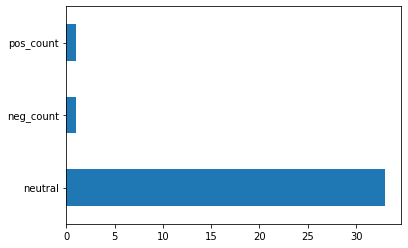

In [231]:
count_tell['type'].value_counts()[:20].plot(kind='barh')

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Robyn seems to to have higher sentiment per song over Cher.

---

Q: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: For Cher: "Behind the Door" & "Alife" are tied in the lowest sentiments. And "Behind the Door" also has the highest sentiment.

---

Q: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: For Robyn: "Blow my Mind" has the highest sentiment, and "oh Baby" has the lowest sentiment.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

A: See above. 




## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

In [316]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
#!pip install spacymoji

import spacy
from spacymoji import Emoji

nlp = spacy.load("en_core_web_sm")
emoji = Emoji(nlp)
nlp.add_pipe("emoji", first=True)

nlp.pipe_names

['emoji',
 'tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

### Cher

In [261]:
df_twitter_cher.head()

,artist,description,tokens
470661,cher,"20😱,she/her, shy, pan🏳️‍🌈. ❤️’s music, kpop, M...",20😱sheher shy pan🏳️‍🌈 ❤️’s music kpop multista...
608685,cher,"Eternal love, the stars above, all there is an...",eternal love the stars above all there is and ...
2586128,cher,Peter Andre follows :). Matt Goss follows :) C...,peter andre follows matt goss follows chesne...
1437593,cher,We are just two friends trying to navigate thi...,we are just two friends trying to navigate thi...
313010,cher,Looking for #GoodTrouble. DJT and the GOP are ...,looking for #goodtrouble djt and the gop are s...


In [ ]:
# your code here

# Extract Emojis from each string

def extract_emojies(x):
    doc = nlp(x['tokens']) #with emojis
    emojis = [token.df_twitter_cher for token in doc if token._.is_emoji]
    
    return emojis

emojies_df = df.apply(extract_emojies,axis=1)
emojies_df

In [277]:
import re
import regex
import emoji

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

text = df_twitter_cher['tokens']
emoji_list= [] 
for t in text:
    emoji_list=emoji_list+split_count(t)


from collections import Counter

#print(Counter(emoji_list))

df_emoji_cher = pd.DataFrame(emoji_list, columns=['emojies'])
df_emoji_cher.head()

,emojies
0,😱
1,🏳️‍🌈
2,❤️
3,👽
4,🙏


In [295]:
emoji_counts_cher = (df_emoji_cher
                .apply(pd.Series) #breaks up the list into seperate columns 
                .stack() #collapses each column into one column
                .value_counts() #counts the frequency of each item
                .rename('Count')
                .sort_values()
                .reset_index()
                .rename(columns={'index':'Emoji'}))

emoji_counts_cher.head()

,Emoji,Count
0,🐺,1
1,♌︎,1
2,💓,1
3,🏳️‍🌈,1
4,❤️,1


In [324]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly

fig = go.Figure()

fig.add_trace(go.Scatter(y=emoji_counts_cher['Emoji'],
                x=emoji_counts['Count'],
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emoji_counts['Emoji'],
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=20),
                ))

fig.update_yaxes(visible =False, range=[0, len(emoji_counts_cher)+1])
fig.update_xaxes(title='Number of Times Used')

fig.update_layout(
    template='simple_white', 
    height=len(emoji_counts_cher)*25, width = 700)

In [347]:
df_twitter_cher['Bing_Liu_Score'] = df_twitter_cher['tokens'].apply(bing_liu_score)
df_twitter_cher[['tokens','Bing_Liu_Score']].sample(10, random_state=0)

,tokens,Bing_Liu_Score
720072,gaudeamus igitur iuvenes dum sumus hic et nunc...,0.0000
608685,eternal love the stars above all there is and ...,0.0625
354473,ths🐺🧡💚 freshman dork🤓,0.0000
903975,անի 🤍♟,0.0000
1562515,ciencia ocultismo música libros networking ani...,0.0000
669110,il mio vero io vaga altrovelontanovaga ancora ...,0.0000
1170829,strangely holy ♑︎ ♈︎ ♌︎,0.0000
3888186,comunicadora social y publicista ✨ insta valen...,0.0000
313010,looking for #goodtrouble djt and the gop are s...,0.0000
2586128,peter andre follows matt goss follows chesne...,0.0000


In [348]:
total_score_cher = df_twitter_cher['Bing_Liu_Score'].sum()
total_score_cher

ave_sentiment_cher = 0.414047619047619/3300000
ave_sentiment_cher

1.2546897546897545e-07

### Robyn

In [319]:
import re
import regex
import emoji

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

text = df_twitter_robyn['tokens']
emoji_list= [] 
for t in text:
    emoji_list=emoji_list+split_count(t)


from collections import Counter

#print(Counter(emoji_list))

df_emoji_robyn = pd.DataFrame(emoji_list, columns=['emojies'])
df_emoji_robyn.head()

,emojies
0,✨
1,💍
2,👶
3,❤
4,♥


In [327]:
emoji_counts_robyn = (df_emoji_robyn
                .apply(pd.Series) #breaks up the list into seperate columns 
                .stack() #collapses each column into one column
                .value_counts() #counts the frequency of each item
                .rename('Count')
                .sort_values()
                .reset_index()
                .rename(columns={'index':'Emoji'}))

emoji_counts_robyn.head()

,Emoji,Count
0,♉️,1
1,🦦,1
2,♑️,1
3,🏳️‍🌈,1
4,☀️,1


In [326]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly

fig = go.Figure()

fig.add_trace(go.Scatter(y=emoji_counts_robyn['Emoji'],
                x=emoji_counts_robyn['Count'],
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emoji_counts['Emoji'],
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=20),
                ))

fig.update_yaxes(visible =False, range=[0, len(emoji_counts_robyn)+1])
fig.update_xaxes(title='Number of Times Used')

fig.update_layout(
    template='simple_white', 
    height=len(emoji_counts_robyn)*25, width = 700)

In [343]:
df_twitter_robyn['Bing_Liu_Score_robyn'] = df_twitter_robyn['tokens'].apply(bing_liu_score)
df_twitter_robyn[['tokens','Bing_Liu_Score_robyn']].sample(10, random_state=0)

,tokens,Bing_Liu_Score_robyn
43488,if im following you youre following me whos t...,0.000000
1833,hehim newtown 20 libra 🌈,0.000000
176647,se tutto va bene un giorno potró avere anche i...,0.000000
127754,director of global community epidemicsound🎶 co...,0.000000
286891,🌵#tijuaspower 🌊 amigo de tijuana🙂 i play 💙músi...,0.000000
48966,its a beautiful day to be alive💕 luxurious lif...,0.117647
67388,🏳️‍🌈 indiana drag queen wiccan hufflepuff gend...,-0.052632
32965,🥪,0.000000
86387,i like pro wrestling and harry styles💞,0.142857
193571,esas segundas oportunidades que se convierten ...,0.000000


In [346]:
total_score_robyn = df_twitter_robyn['Bing_Liu_Score_robyn'].sum()
total_score_robyn

ave_sentiment_robyn = 0.414047619047619/357000
ave_sentiment_robyn

1.159797252234227e-06

Q: What is the average sentiment of your two artists? 

A: Cher: 1.2546897546897545e-07
   Robyn: 1.159797252234227e-06

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: See in the plot.

